In [11]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

# search model's results

In [138]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import get_models_from_rootdir

survey_name = 'alerceZTFv7.1'
kf = 0
set_name = f'{kf}@r_test' # r_train s_val r_val r_test
rootdir = f'../save/experiments/{set_name}'
cset_name = set_name.split('@')[-1]
model_names = get_models_from_rootdir(f'{rootdir}/pre-training')
for kmn,model_name in enumerate(model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=pre-training°rsc=0
[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=pre-training°rsc=0
[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=pre-training°rsc=0


In [139]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import filter_models

condition_dict = {
    #'mdl':['ParallelAttnTCNN', 'SerialAttnTCNN'],
    'cell':['GRU', 'LSTM'],
    #'aggregation':['max', 'avg'],
}
idxs = [
    0,1,2,
    3,7,9,
]
new_model_names = model_names
#new_model_names = filter_models(model_names, condition_dict)
#new_model_names = [model_names[idx] for idx,model_name in enumerate(model_names) if idx in idxs]
for kmn,model_name in enumerate(new_model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=pre-training°rsc=0
[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=pre-training°rsc=0
[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=pre-training°rsc=0


# metrics v/s days

In [140]:
baselines_dict = {
    'r_val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    'r_test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][1#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=pre-training°rsc=0
[1][1#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=pre-training°rsc=0
[2][1#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=pre-training°rsc=0
[0][0#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=pre-training°rsc=0


ValueError: need at least one array to concatenate

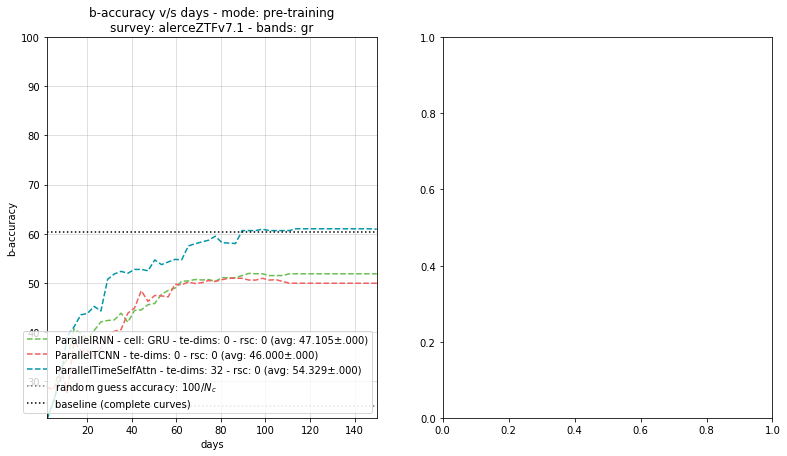

In [143]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'te-dims',
    'rsc',
]
metric_name = 'b-accuracy'
#metric_name = 'b-f1score'
plot_metric(rootdir, metric_name, new_model_names, baselines_dict.get(cset_name, None), label_keys)

# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(rootdir, new_model_names)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)